In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv('diabetes.csv')
x=dataset.iloc[:,[0,1,2,3,4,6,7]]
y=dataset.iloc[:,5]

In [ ]:
# test validation split 해주기
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Regression(Random Forest,Decision Tree,Linear Regression)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error


Random Forest Regression

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = rfr.predict(x_test)


In [ ]:
print('평균제곱근오차', mean_squared_error(y_pred, y_test))


평균제곱근오차 53.863333766233765


Decision *Tree* Regression

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

In [ ]:
print('평균제곱근오차', mean_squared_error(y_pred, y_test))


평균제곱근오차 72.83142857142856


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)

In [ ]:
print('평균제곱근오차', mean_squared_error(y_pred, y_test))


평균제곱근오차 59.22734666529342


Deep Learning Regression

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(8,activation="tanh"),
    layers.Dense(8,activation="tanh"),
    layers.Dense(1)
])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [ ]:
history=model.fit(x_train,y_train,epochs=150,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1032.5414 - mse: 1032.5414 - val_loss: 1135.8734 - val_mse: 1135.8734
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1040.0564 - mse: 1040.0564 - val_loss: 1126.5049 - val_mse: 1126.5049
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1052.1593 - mse: 1052.1593 - val_loss: 1116.7446 - val_mse: 1116.7448
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1011.4319 - mse: 1011.4319 - val_loss: 1105.9420 - val_mse: 1105.9420
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1020.4965 - mse: 1020.4965 - val_loss: 1093.4056 - val_mse: 1093.4056
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 997.4861 - mse: 997.4861 - val_loss: 1078.6499 - val_mse: 1078.6499
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 985.7825 - mse: 985.7825 - val_loss: 1061.7833 - val_mse: 1061.7833
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 972.7014 - mse: 972.7014 - val_loss: 1042

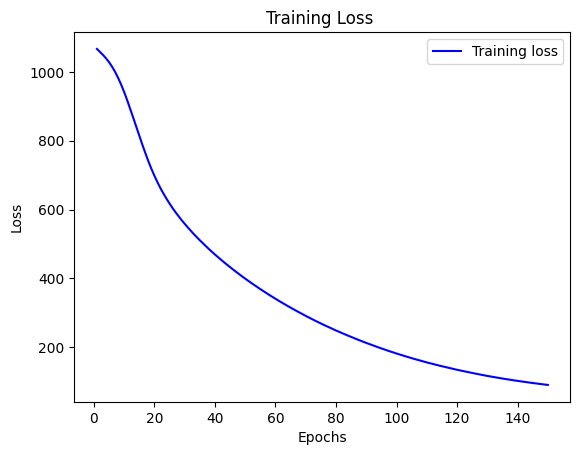

In [ ]:
history_dict=history.history
loss_values=history_dict["loss"]
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,"b",label="Training loss")
plt.title("Training Loss ")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
print(history_dict.keys())

dict_keys(['loss', 'mse'])


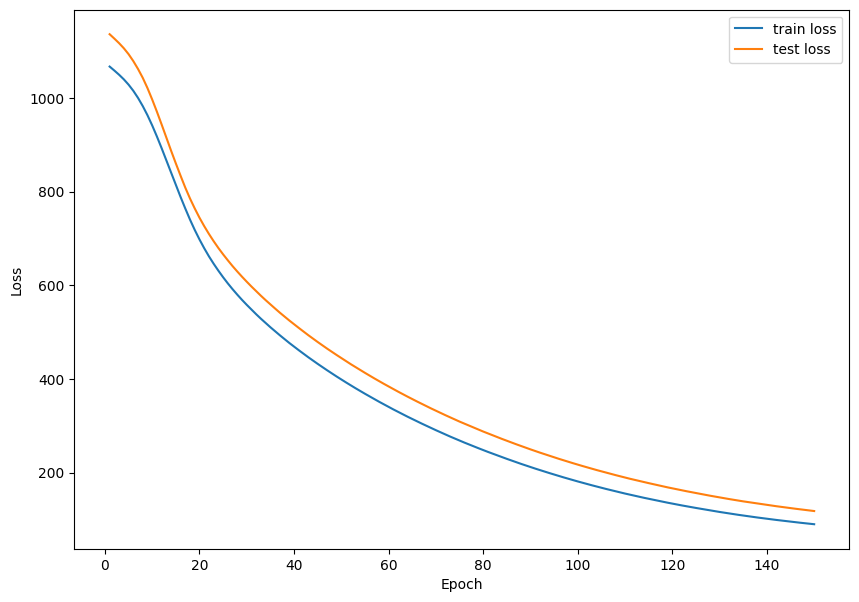

In [ ]:
# loss 체크
plt.figure(figsize=(10,7))
epochs=range(1,len(loss_values)+1)

plt.plot(epochs, history.history['loss'], label='train loss')
plt.plot(epochs, history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()